In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("final_dataset.csv")
print(df.head()) # Displays the first 5 rows

<h3>Cleaning Data:</h3>

In [28]:
df.isnull().values.any()   # True if any null value in DataFrame

np.False_

<h2>1. Average Monthly AQI</h>

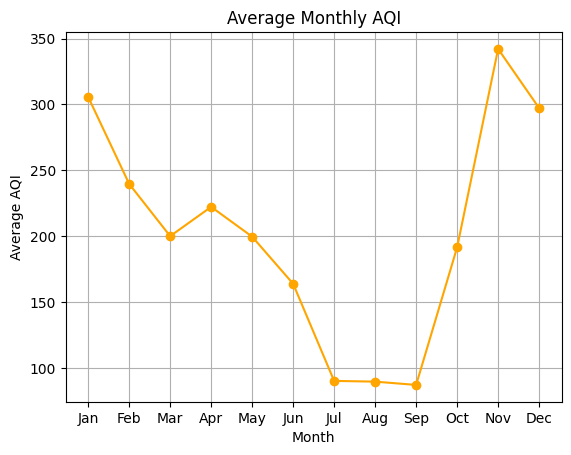

In [63]:
month_names = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
               7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}

monthly_avg = df.groupby("Month")["AQI"].mean()
plt.plot(monthly_avg.index.map(month_names), monthly_avg.values, marker="o", color="orange")
plt.title("Average Monthly AQI")
plt.xlabel("Month")
plt.ylabel("Average AQI")
plt.grid(True)
plt.show()

<h5>Note: Above chart shows average AQI for each month from Jan to Dec.</h5>

<h2>2. Daily AQI for January</h2>

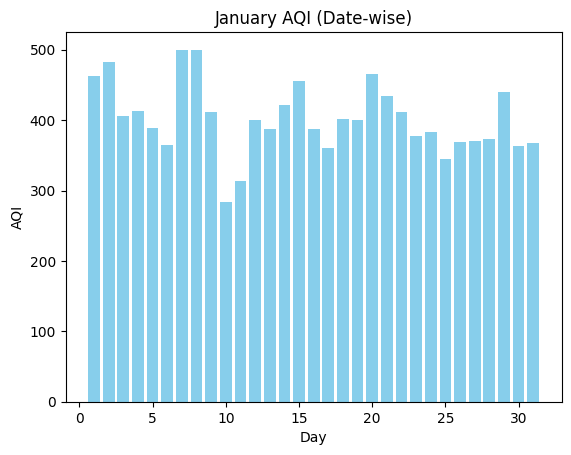

In [64]:
feb_df = df[df["Month"] == 1]
plt.bar(feb_df["Date"], feb_df["AQI"], color="skyblue")
plt.title("January AQI (Date-wise)")
plt.xlabel("Day")
plt.ylabel("AQI")
plt.show()

<h5>Note: Above chart displays AQI levels for each day in January 2021.</h5>

<h2>3. Average AQI by Season</h2>

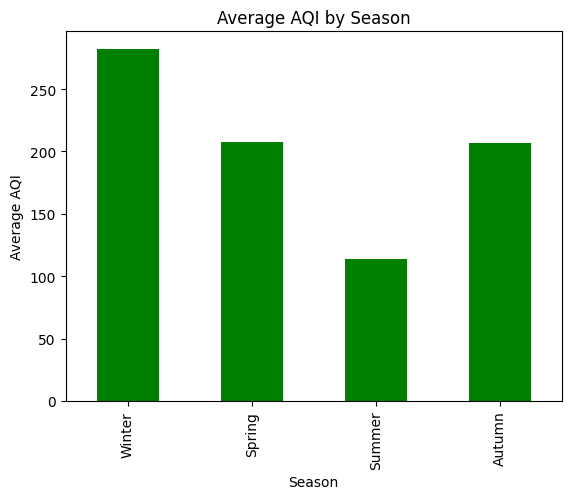

In [57]:
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

df["Season"] = df["Month"].apply(get_season)
season_avg = df.groupby("Season")["AQI"].mean().reindex(["Winter", "Spring", "Summer", "Autumn"])
season_avg.plot(kind="bar", color="green")
plt.title("Average AQI by Season")
plt.xlabel("Season")
plt.ylabel("Average AQI")
plt.show()

<h5>Note: Above chart compares AQI averages for different seasons.</h5>

<h2>4. Pollutant Share</h2>

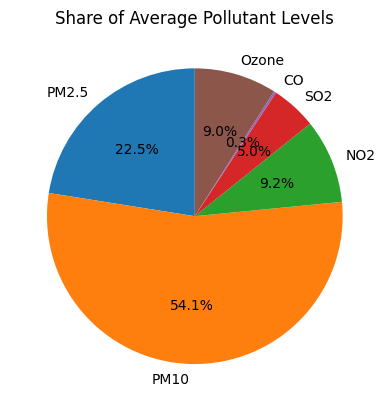

In [58]:
pollutants = ["PM2.5", "PM10", "NO2", "SO2", "CO", "Ozone"]
avg_values = df[pollutants].mean()

# Pie chart
plt.pie(avg_values, labels=avg_values.index, autopct="%1.1f%%", startangle=90)
plt.title("Share of Average Pollutant Levels")
plt.show()

<h5>Note: Above chart shows the percentage contribution of each pollutant to overall air quality.</h5>

<h2>5. Top 10 Lowest AQI Days</h2>

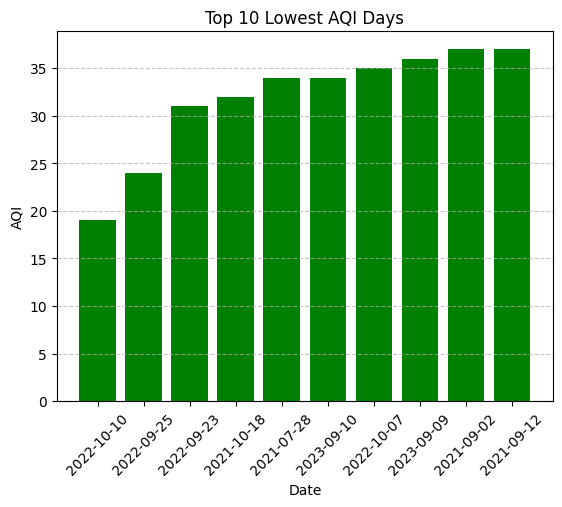

In [62]:
df["Full_Date"] = pd.to_datetime(df[["Year", "Month", "Date"]].rename(columns={"Date": "day"}))
top10_low = df.nsmallest(10, "AQI").sort_values("AQI")  # sort by AQI for clarity

plt.bar(top10_low["Full_Date"].dt.strftime("%Y-%m-%d"), top10_low["AQI"], color="green")
plt.title("Top 10 Lowest AQI Days")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

<h5>Note: Above chart shows the 10 days with the best air quality.</h5>

<h2>Top 10 Highest AQI Days</h2>

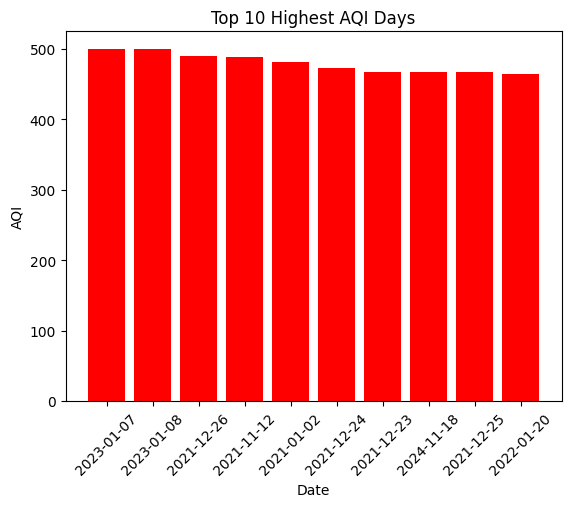

In [70]:

top10 = df.nlargest(10, "AQI")
plt.bar(top10["Full_Date"].astype(str), top10["AQI"], color="red")
plt.title("Top 10 Highest AQI Days")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.xticks(rotation=45)
plt.show()

<h5>Note: Above chart shows the 10 days with the worst air quality.</h5>